In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [9]:
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [11]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print ("Total: %i"%len(train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

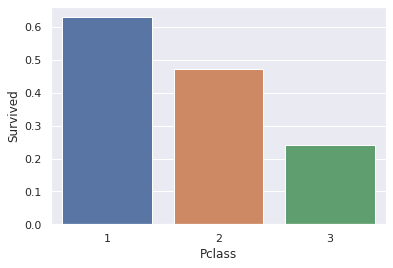

In [58]:
train.Pclass.value_counts()
train.groupby("Pclass").Survived.value_counts()
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

sns.barplot(x='Pclass', y='Survived', ci=None, data=train)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

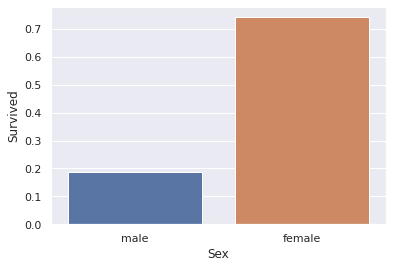

In [59]:
train.Sex.value_counts()
train.groupby("Sex").Survived.value_counts()
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

sns.barplot(x='Sex', y='Survived', ci=None, data=train)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

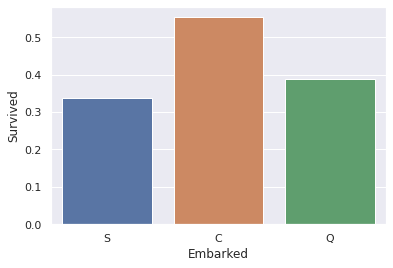

In [60]:
train.Embarked.value_counts()
train.groupby("Embarked").Survived.value_counts()
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

sns.barplot(x='Embarked', y='Survived', ci=None, data=train)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

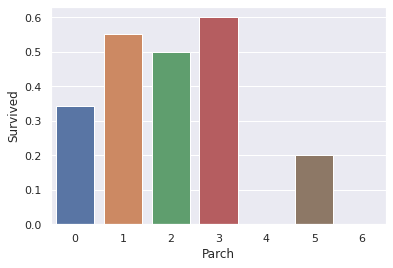

In [61]:
train.Parch.value_counts()
train.groupby("Parch").Survived.value_counts()
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

sns.barplot(x='Parch', y='Survived', ci=None, data=train)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

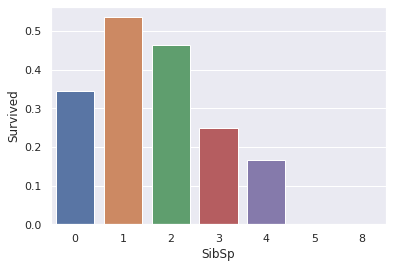

In [62]:
train.SibSp.value_counts()
train.groupby("SibSp").Survived.value_counts()
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

sns.barplot(x='SibSp', y='Survived', ci=None, data=train)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

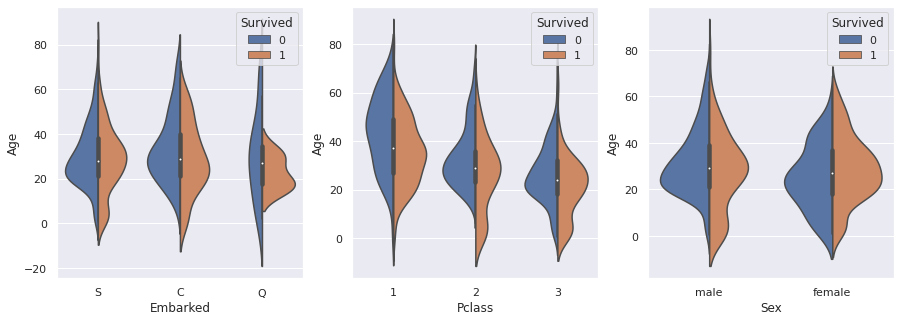

In [64]:
train.Age.value_counts()
train.groupby("Age").Survived.value_counts()
train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()



fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

<AxesSubplot:>

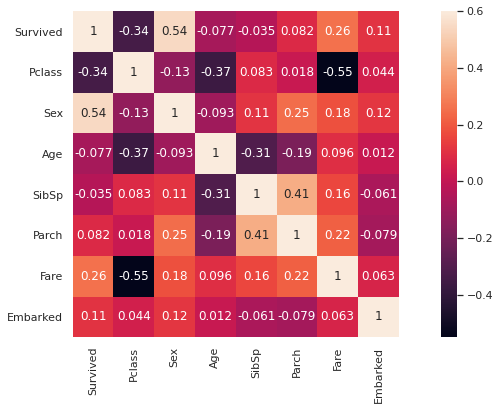

In [66]:
train.Sex = train.Sex.map({"male": 1, "female": 2})
train.Embarked = train.Embarked.map({"S": 1, "C": 2, "Q": 3})

plt.figure(figsize=(15,6))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)